In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('./App_Behaviour/Subcription App Behaviour.csv')
df

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,14:51.3,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,16:00.9,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,19:09.2,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,08:46.4,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,11:49.5,0
4,51549,50:48.7,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,56:37.8,1
5,56480,58:15.8,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,59:03.3,0
6,144649,33:18.5,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,07:49.9,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,22:01.6,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,24:54.5,0
9,338013,22:16.0,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,31:58.9,0


In [3]:
df['enrolled_date'].isna().sum()

18926

In [4]:
df.isna().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [5]:
#HyperParameters
n_trees = 100

In [6]:
screen_vocab = set((','.join(df['screen_list'])).split(','))
screen_index = {s:i for i,s in enumerate(screen_vocab)}
vocab_size = len(screen_vocab)
ind_screen_indices = list(df['screen_list'].apply(lambda x : [screen_index[w] for w in x.split(',')]))

freq_list = np.zeros((df.shape[0], vocab_size))
for i in range(df.shape[0]):
    for ind in ind_screen_indices[i]:
        freq_list[i, ind] += 1
freq_list = freq_list/vocab_size



idf = np.zeros(vocab_size)
for x in ind_screen_indices:
    idf[list(set(x))] += 1
    
tf_idf = freq_list*np.tile(np.log((1.0 + df.shape[0]*np.ones(vocab_size))/(1.0 + idf)), (df.shape[0], 1))
df_freq = pd.DataFrame(tf_idf, columns = ['V' + str(i) for i in range(vocab_size)])

In [7]:
from sklearn.preprocessing import StandardScaler
first_open = df['first_open'].apply(lambda x : float(x.split(':')[0]) + float(x.split(':')[1][:2])*60.0 + float(x.split(':')[1][3:])*3600)
access_time = pd.Series(df['dayofweek']*24 + (df['hour'].apply(lambda x : float(x[:2]))), name = 'access_time')
first_open = first_open.to_frame()
access_time = access_time.to_frame()

df.drop(labels = ['screen_list', 'user', 'enrolled_date', 'first_open', 'dayofweek', 'hour'], axis = 1, inplace = True)


padded_indices = None
mean_screen = None
ind_screen_indices = None
df = pd.concat([first_open, access_time, df_freq, df], axis = 1)
col_list = [x for x in list(df.columns) if x  != 'enrolled']
scaler = StandardScaler()
df[col_list] = scaler.fit_transform(df[col_list])
df

,first_open,access_time,V0,V1,V2,V3,V4,V5,V6,V7,...,V133,V134,V135,V136,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,-0.399797,-0.032562,-0.12465,-0.450901,-0.015494,-0.158213,-0.235486,1.054524,-0.051838,-1.036174,...,-0.182814,-0.018442,-0.034371,-0.010955,-0.807572,-0.387567,-0.347635,-0.455805,0,-0.444528
1,1.391446,1.443310,-0.12465,-0.450901,-0.015494,-0.158213,-0.235486,1.054524,-0.051838,0.965089,...,-0.182814,-0.018442,-0.034371,-0.010955,-0.715007,-0.514723,-0.347635,-0.455805,0,-0.444528
2,-0.990535,-0.995979,-0.12465,-0.450901,-0.015494,-0.158213,-0.235486,-0.948295,-0.051838,-1.036174,...,-0.182814,-0.018442,-0.034371,-0.010955,-0.807572,-1.150505,-0.347635,2.193918,0,2.249579
3,-0.081582,0.479893,-0.12465,2.217783,-0.015494,6.320604,-0.235486,1.054524,-0.051838,0.965089,...,-0.182814,-0.018442,-0.034371,-0.010955,-0.344746,1.201889,-0.347635,-0.455805,1,-0.444528
4,0.977399,-0.995979,-0.12465,2.217783,-0.015494,-0.158213,-0.235486,-0.948295,-0.051838,-1.036174,...,-0.182814,-0.018442,-0.034371,-0.010955,-0.067050,0.693263,-0.347635,-0.455805,1,2.249579
5,1.134671,-0.524520,-0.12465,-0.450901,-0.015494,-0.158213,-0.235486,-0.948295,-0.051838,-1.036174,...,-0.182814,-0.018442,-0.034371,-0.010955,-1.085267,-0.451145,-0.347635,-0.455805,1,-0.444528
6,0.106314,-1.016477,-0.12465,-0.450901,-0.015494,-0.158213,-0.235486,-0.948295,-0.051838,-1.036174,...,-0.182814,-0.018442,-0.034371,-0.010955,0.303210,-1.150505,-0.347635,-0.455805,0,-0.444528
7,1.674595,-1.016477,-0.12465,-0.450901,-0.015494,-0.158213,-0.235486,-0.948295,-0.051838,-1.036174,...,-0.182814,-0.018442,-0.034371,-0.010955,-0.529876,1.265467,-0.347635,2.193918,0,-0.444528
8,0.354492,-0.504021,-0.12465,2.217783,-0.015494,-0.158213,-0.235486,-0.948295,-0.051838,0.965089,...,-0.182814,-0.018442,-0.034371,-0.010955,-0.252181,0.756842,2.876581,2.193918,1,-0.444528
9,-1.645225,0.479893,-0.12465,-0.450901,-0.015494,-0.158213,-0.235486,1.054524,-0.051838,0.965089,...,-0.182814,-0.018442,-0.034371,-0.010955,-0.529876,-0.133254,-0.347635,-0.455805,1,-0.444528


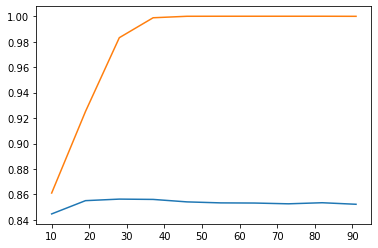

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

labels = df['enrolled']
features = df.drop('enrolled', axis = 1)
validation_acc = []
train_acc = []
X_Train, X_Test, Y_Train, Y_Test = train_test_split(features, labels, test_size=0.33, random_state=20)
for depth in range(10, 100, 9):
    model = RandomForestClassifier(n_estimators = n_trees, max_depth = depth)
    model.fit(X_Train, Y_Train)
    Y_Test_pred = model.predict(X_Test)
    Y_Train_pred = model.predict(X_Train)
    validation_acc.append(accuracy_score(Y_Test, Y_Test_pred))
    train_acc.append(accuracy_score(Y_Train, Y_Train_pred))
plt.plot(range(10, 100, 9), validation_acc)
plt.plot(range(10, 100, 9), train_acc)
plt.show()

In [9]:
print(max(validation_acc))

0.8563030303030303
